In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import math

# 2 sample t-test with low-cost and moderately expensive

In [16]:


sample_mean1 = 12.453
sample_std1 = 11.27
n1 = 684
sample_mean2 = 11.281
sample_std2 = 10.68
n2 = 6183

pooled_sample_std = math.sqrt(((n1-1)*sample_std1**2 + (n2-1)*sample_std2**2)/(n1+n2-2))
statistic = (sample_mean1-sample_mean2)/(pooled_sample_std*math.sqrt((1/n1)+(1/n2)))
print("T Statistic is: ", statistic)

T Statistic is:  2.7080792368533255


In [17]:
# Using python to find the p value and critical value

from scipy.stats import t

print("P value is: ", 1- t.cdf(statistic,n1+n2-2))
print("Critical Value of z is: ", t.ppf(0.025, n1+n2-2)) #alpha is 0.05

P value is:  0.0033920773178541808
Critical Value of z is:  -1.9603096047043391


As the Pvalue is smaller than 0,05 thus I reject the H0, so there is no significant differnece in delays betwwen the low-cost and the moderately expensive categories

# ANOVA for comparing all 4 price ranking categories

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_excel('/Users/khegyi/Code/Bootcamp 9th final project week/flights_all_DE_cleaned.csv+ (Multiple Connections)_flights_all_DE_cleaned_Tableau.xlsm', sheet_name='only_delayed_flights')
data.head()


,Price_ranking_group,Arrival_Delay
0,3. moderately low,3
1,3. moderately low,3
2,1. expensive,3
3,2. moderately expensive,3
4,3. moderately low,3


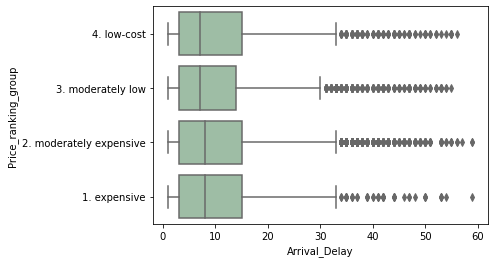

In [41]:
#creating boxplot

ax = sns.boxplot(x='Arrival_Delay', y='Price_ranking_group', data=data, color='#99c2a2', 
                 order=['4. low-cost','3. moderately low', '2. moderately expensive', '1. expensive'])
plt.show()

In [45]:
#using python to conduct ANOVA 
model = ols('Arrival_Delay ~ C(Price_ranking_group)',data=data).fit()
table = sm.stats.anova_lm(model)
#table = sm.stats.anova_lm(model, typ=2)
print(table)


                             df        sum_sq      mean_sq         F    PR(>F)
C(Price_ranking_group)      3.0  3.036750e+03  1012.250064  9.323333  0.000004
Residual                13800.0  1.498289e+06   108.571692       NaN       NaN


H0: There is no sifginficant difference in delays between the price ranking groups.

As P value as far below 0,05, thus I keep the null hypothesis: in conclusion, there is significant difference in average delays between the price ranking groups, at least between 2 groups.

P value = 0.000004
    

In [51]:
#checking differences and p value on each category

from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=data, res_var='Arrival_Delay', xfac_var='Price_ranking_group', 
              anova_model='Arrival_Delay ~ C(Price_ranking_group)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3. moderately low,1. expensive,0.999764,-0.152229,2.151757,3.153429,0.115398
1,3. moderately low,2. moderately expensive,1.075732,0.546651,1.604813,7.387831,0.001000
2,3. moderately low,4. low-cost,0.635467,-0.041786,1.312720,3.409393,0.075197
3,1. expensive,2. moderately expensive,0.075967,-1.050360,1.202295,0.245074,0.900000
4,1. expensive,4. low-cost,0.364297,-0.838765,1.567360,1.100279,0.848455
5,2. moderately expensive,4. low-cost,0.440265,-0.192348,1.072877,2.528782,0.279218


As all the p values are more than 0.05, we keep the null hypothesis: there is no significant difference in delays.

The only exception is between the 2. and the 3. category, where p value is lower then 0,05, so we reject the null hypothesis.

Based on the analysis between the 2. and the 3. category there is a significant difference in flight delays. 
The 2. category delays more.